This notebook is a simple introduction to pytorch, assuming you already know  python, numpy and the notebooks. PyTorch is a python module dedicated to deep-learning. Everything is based on a specific data structure: the tensor. 

Machine learning basically relies on three components: 
- the model: in this course this is a Neural Network and in pytorch a **module**
- the model is trained to minimize a **loss** function
- this minization can be achieved with gradient descent (or one of its variant) with an **optimizer**. 
In this notbook we will introduce these 3 components and also the basic data structure (the tensors). 


To start with pytorch, here are some external websites: 
- http://pytorch.org/tutorials/ : official tutorials
- http://pytorch.org/docs/master/ : official documentation

Before, check the version of pytorch

In [24]:
import torch as th
print(th.__version__)
import matplotlib.pyplot as plt
import torch.nn as nn

2.0.0+cu117


You should have a version of at least 1.0.0. 

You should have a version of at least 1.0.0. 
# Pytorch overview

## Tensor  overview
For users who are familiar with numpy arrays, the PyTorch **Tensor** class is very similar. PyTorch is like NumPy, but with GPU acceleration and automatic computation of gradients. This  makes it suitable for deep learning: calculating backward pass data automatically starting from a forward expression.

The forward pass is implemented as a computation graph. The **Tensor** is the basic piece of this computation graph, to encode the data (input/output) and the parameters of the model. 
A Tensor is both a tensor (like a numpy array or a matlab matrix) and a variable (or a node) of the computation graph. A Tensor can store data and the associated gradients.



**IMPORTANT NOTE: ** Since torch 0.3, a **Tensor** is a **Variable** that wraps a tensor. Before these 2 concepts were separated. 

## Module overview

A module is a part of a NNet. It may contains Tensors. The core PyTorch modules for building neural networks are located in *torch.nn*, which provides common neural network layers and other architectural components. Fully connected layers, convolutional layers, activation functions, and loss functions can all be found here. Modules can be seen as pre-built pieces of computation graph. 

A simple example of *module* is `Linear`: it's a fully connected layer, so a linear transformation of the input. It contains a matrix of parameters (a Tensor). Activation function are also `Module`. You can therefore create a cascade of `Linear` module with a `Sigmoid`, for example. 

A special kind of module is a *container* : a module that contains other module. The most widely used is `Sequential`: it's a container to implement a feed-forward network. When you create a `Sequential` object you pass him an ordered list of modules to create the cascade of operation. 


## Gradient computation and optimization
To learn the model, we need to things: 
- Compute the gradient of the loss with respect to the parameters. The gradients are computed via auto-differentiation. This is the role of the **backward** function.  
- Update the parameters, with these gradient values. This is the role of the **optimizer**. The optimizer is an object that manage the gradient descent updates. 


# Tensor

To start with  *Tensor*s, read this link first :
http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html. 
and then look at the operations on tensors:  http://pytorch.org/docs/master/torch.html. 

## Basics
Now, you can answer the following questions: 
* Build a tensor of dimensions (2,3) filled with integers from 1  to 6. 
* Convert this  Tensor in array numpy and back. 
* Compute the sum of its elements, the sum per rows and per columns. 
* Build a tensor of dimensions (3,2) filled with random numbers. Numbers are drawn from the uniform distribution on [0,1]
* Same with a gaussian  (mean=0, variance=1). 

Remember, you can use ask for help, like in the following cell. 
But in most of the case it is easier to use the online documentation of the function: https://pytorch.org/docs/stable/torch.html#torch.arange

In [3]:
# A hint 
help(th.arange)


Help on built-in function arange in module torch:

arange(...)
    arange(start=0, end, step=1, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a 1-D tensor of size :math:`\left\lceil \frac{\text{end} - \text{start}}{\text{step}} \right\rceil`
    with values from the interval ``[start, end)`` taken with common difference
    :attr:`step` beginning from `start`.
    
    Note that non-integer :attr:`step` is subject to floating point rounding errors when
    comparing against :attr:`end`; to avoid inconsistency, we advise adding a small epsilon to :attr:`end`
    in such cases.
    
    .. math::
        \text{out}_{{i+1}} = \text{out}_{i} + \text{step}
    
    Args:
        start (Number): the starting value for the set of points. Default: ``0``.
        end (Number): the ending value for the set of points
        step (Number): the gap between each pair of adjacent points. Default: ``1``.
    
    Keyword args:
        out 

In [4]:
# TODO 

#Tensor A of dimensions (2,3) filled with integers from 1 to 6
A = th.arange(1,7)
A = th.reshape(A,(2,3))
print(A)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [5]:
#Convert Tensor to numpy back
a = A.numpy()
B = th.from_numpy(a)
print(a,B)

[[1 2 3]
 [4 5 6]] tensor([[1, 2, 3],
        [4, 5, 6]])


In [6]:
#Computation of the sums of its elements, the sum per rows and per columns
sum = th.sum(B)
sum_columns = th.sum(B,0)
sum_rows = th.sum(B,1)
print(sum, sum_columns, sum_rows)

tensor(21) tensor([5, 7, 9]) tensor([ 6, 15])


In [7]:
#Tensor of dimensions (3,2) with random numbers from uniform distribution [0,1]
A_uniform = th.rand((2,3))
print(A_uniform)

tensor([[0.0180, 0.9768, 0.8928],
        [0.0678, 0.2740, 0.7854]])


In [8]:
#Tensor of dimensions (3,2) with random numbers from uniform distribution [0,1]
A_gaussian = th.randn((2,3))
print(A_gaussian)

tensor([[ 0.7717, -1.0143,  0.1317],
        [ 2.0874,  0.3006,  0.9893]])


## Operation and access

* Extract the first row and the last row (do the same with columns)
* Build a matrix  A of dimension (2,3), a matrix  B (2,1) et and  C (1,4) with random initialisation. 
* Concatenate A with B, and add the results with C. 
* Create A (5,4), then B (3,4) which contains in this order: the second, the first and the fourth row of A. 

In [9]:
#Extract the first row and the last row and the same for columns
print("First row :", A[0,:])
print("Last row :", A[-1,:])
print("First column :", A[:,0])
print("Last column :", A[:,-1])


First row : tensor([1, 2, 3])
Last row : tensor([4, 5, 6])
First column : tensor([1, 4])
Last column : tensor([3, 6])


In [10]:
#Build a matrix A of dimension (2,3), a matrix B (2,1) and a matrix (1,4) with random initialisation

A = th.rand((2,3))
B = th.rand((2,1))
C = th.rand((1,4))

print("A : ", A, "\nB : ", B , "\nC : ",C)

A :  tensor([[0.7718, 0.8604, 0.4662],
        [0.4991, 0.7236, 0.0964]]) 
B :  tensor([[0.9493],
        [0.3538]]) 
C :  tensor([[0.9915, 0.7890, 0.7140, 0.4097]])


In [11]:
#Concatenate A with B, then add the results with C
res = th.cat((A,B), 1)
print(res)
res = res + C
print(res)

tensor([[0.7718, 0.8604, 0.4662, 0.9493],
        [0.4991, 0.7236, 0.0964, 0.3538]])
tensor([[1.7633, 1.6494, 1.1802, 1.3591],
        [1.4906, 1.5126, 0.8104, 0.7635]])


In [12]:
#Create A (5,4), then B (3,4) which contains in this order: the second, the first and the fourth row of A. 

A = th.rand((5,4))
B = th.ones((3,4))
B[0,:] = A[1,:]
B[1,:] = A[0,:]
B[2,:] = A[3,:]
print("A : ", A, "\nB : ", B)


A :  tensor([[0.1771, 0.2291, 0.4124, 0.0376],
        [0.9306, 0.4967, 0.4718, 0.5079],
        [0.6169, 0.3447, 0.0505, 0.7129],
        [0.5518, 0.4470, 0.7311, 0.4380],
        [0.4599, 0.3992, 0.9352, 0.2087]]) 
B :  tensor([[0.9306, 0.4967, 0.4718, 0.5079],
        [0.1771, 0.2291, 0.4124, 0.0376],
        [0.5518, 0.4470, 0.7311, 0.4380]])


Look at the following code and how  x2 is built from x. 

In [13]:
x = th.randn(5, 4)
print(x)

x2= th.stack((x,x) , dim=0)
print (x2[0]) 
print (x2.size()) 

x2= th.stack((x,x) , dim=1)
print (x2[0]) 
print (x2.size()) 

x2= th.stack((x,x) , dim=2)
print (x2[0]) 
print (x2.size())


tensor([[ 0.6827, -1.6309, -1.7141, -0.2642],
        [-1.4145, -0.8600, -0.4685, -0.9528],
        [-0.3880,  1.6036, -0.1887,  0.6893],
        [-0.9386,  1.1893, -0.5342,  0.2394],
        [-0.9872,  0.8451, -1.0132, -0.5689]])
tensor([[ 0.6827, -1.6309, -1.7141, -0.2642],
        [-1.4145, -0.8600, -0.4685, -0.9528],
        [-0.3880,  1.6036, -0.1887,  0.6893],
        [-0.9386,  1.1893, -0.5342,  0.2394],
        [-0.9872,  0.8451, -1.0132, -0.5689]])
torch.Size([2, 5, 4])
tensor([[ 0.6827, -1.6309, -1.7141, -0.2642],
        [ 0.6827, -1.6309, -1.7141, -0.2642]])
torch.Size([5, 2, 4])
tensor([[ 0.6827,  0.6827],
        [-1.6309, -1.6309],
        [-1.7141, -1.7141],
        [-0.2642, -0.2642]])
torch.Size([5, 4, 2])


## Reshape and squeeze

The method **view()** is similar to *reshape*. This is **important** since with neural net, you will often need to play with dimensions. 

* Build a tensor of size (2, 3, 4)
* Convert it in a matrix of dimension (3,8) and (2,12)
* What does  *view(2,-1)*  do ? 

In [14]:
#Build a tensor of size (2, 3, 4)
A = th.rand((2,3,4))
print("A(2,3,4) :", A)
B= A.view(3,8)
print("A(3,8) :", B)
C= A.view(2,12)
print("A(2,12) :", C)
D = A.view(2,-1)
print("view(2,-1) :", D)
print('view(2,-1) crée une matrice de deux lignes et d\'autant de colonne que nécessaire pour mettre les données de la matrice. Pratique quand on ne sait pas très bien combien il faut de colonne pour restructurer la matrice')


A(2,3,4) : tensor([[[0.0392, 0.0263, 0.5743, 0.4460],
         [0.3262, 0.7837, 0.7162, 0.4960],
         [0.2141, 0.3284, 0.0672, 0.3405]],

        [[0.6025, 0.4531, 0.0708, 0.6991],
         [0.6091, 0.5353, 0.8518, 0.1657],
         [0.1295, 0.2292, 0.2492, 0.3802]]])
A(3,8) : tensor([[0.0392, 0.0263, 0.5743, 0.4460, 0.3262, 0.7837, 0.7162, 0.4960],
        [0.2141, 0.3284, 0.0672, 0.3405, 0.6025, 0.4531, 0.0708, 0.6991],
        [0.6091, 0.5353, 0.8518, 0.1657, 0.1295, 0.2292, 0.2492, 0.3802]])
A(2,12) : tensor([[0.0392, 0.0263, 0.5743, 0.4460, 0.3262, 0.7837, 0.7162, 0.4960, 0.2141,
         0.3284, 0.0672, 0.3405],
        [0.6025, 0.4531, 0.0708, 0.6991, 0.6091, 0.5353, 0.8518, 0.1657, 0.1295,
         0.2292, 0.2492, 0.3802]])
view(2,-1) : tensor([[0.0392, 0.0263, 0.5743, 0.4460, 0.3262, 0.7837, 0.7162, 0.4960, 0.2141,
         0.3284, 0.0672, 0.3405],
        [0.6025, 0.4531, 0.0708, 0.6991, 0.6091, 0.5353, 0.8518, 0.1657, 0.1295,
         0.2292, 0.2492, 0.3802]])
view(2,-1)

Assume you have a Tensor A of dimensions (3,2,1) that you initialized as you want:
- look at the documentation of the method **squeeze**
- Try it on A
- And do the reverse with unsqueeze

In [15]:
A = th.rand((3,2,1))
print("A( :", A)
A = A.squeeze()
print("A_squeezed :", A)
A = A.unsqueeze(2)
print("A_unsqueezed :", A)

A( : tensor([[[0.5428],
         [0.6044]],

        [[0.1151],
         [0.4421]],

        [[0.6069],
         [0.2715]]])
A_squeezed : tensor([[0.5428, 0.6044],
        [0.1151, 0.4421],
        [0.6069, 0.2715]])
A_unsqueezed : tensor([[[0.5428],
         [0.6044]],

        [[0.1151],
         [0.4421]],

        [[0.6069],
         [0.2715]]])


# Automatic differentiation  (auto-grad)

`torch.autograd` provides classes and functions implementing automatic differentiation. 
When a tensor is created with `requires_grad=True`, the object will be able to store information about the gradient. In the following example, we build a computational graph. The "end" of this graph must be a scalar for automatic differentiation. Look at the following code. 



In [16]:
x = th.randn(1, 1, requires_grad=True)
print("x:",x)
print("x.grad:",x.grad)

x: tensor([[-0.2011]], requires_grad=True)
x.grad: None


The Tensor `x` has an attribute `grad`. It is set to None for the moment.
To build a computational graph using `x`, we just need to create new variables using torch operation.  The function `backward` can be called on a Tensor that contains a scalar. It computes the gradient (the partial derivatives) of the this scalar value with respect to all the Tensors involved in the computation. Look at the following code:

In [17]:
y = 2*x+1 
print(y)
y.backward()
print(x.grad)

tensor([[0.5979]], grad_fn=<AddBackward0>)
tensor([[2.]])


Can you explain the result ? 

#The gradient of y by x is 2, as the result show. backward has an understanding of the computation leading to y by regards of the tensor used.

The computation graph can be of course deeper. For instance, we can introduce a new variable `w`, a tensor as well. 

In [18]:
w = th.randn(1,1, requires_grad=True)
x = th.randn(1, 1, requires_grad=True)

print("w=",w.item()," and x=",x.item())

w= 0.0055915885604918  and x= -0.28316938877105713


In [19]:
z = w*x
z.backward()
print(x.grad)
print(w.grad)

tensor([[0.0056]])
tensor([[-0.2832]])


What do you think about the result ? 

#The gradient of z by w is x and the gradient of z by x is w, it is coherent with the operation

It is worth noticing that the gradient is a tensor operation on a scalar value: we compute the partial derivative of a scalar quantity w.r.t a tensor. The variable on which we run the backward must be a single value. 

Let us consider the following code: can you explain the results ? 

#The gradient computation from a function has an understanding of the history of x, and is then able to compute the individual gradient of each x, even if their is a sum. Then the gradient of g by x_i is 0.5\*2\*x_i 

In [20]:
x = th.randn(2,2,requires_grad=True)        # x is a square matrix
print(x)
out = 0.5*x.pow(2).sum() # out is a new variable (scalar)
out.backward()           # back propagation in the graph
print("g:",x.grad)       # the gradient of out with respect to x 
print("x:",x)            # A simple check. Is it what expected ?  

tensor([[ 0.0126, -0.4710],
        [ 0.8673, -1.5933]], requires_grad=True)
g: tensor([[ 0.0126, -0.4710],
        [ 0.8673, -1.5933]])
x: tensor([[ 0.0126, -0.4710],
        [ 0.8673, -1.5933]], requires_grad=True)


And for this example  ?

#The same if for here, backward is able to distinguish x_i and w_i and compute them accordingly for the gradient of out by w (which is 0,5\*2\*x)and then by x (which is 0,5\*2\*w). @ is the operator to multiply for tensor

In [21]:
x = th.randn(2,2,requires_grad=True)        # x is a square matrix
print(x)
w = th.ones(1,2,requires_grad=True)
print(w)
out = 0.5*(w@x).pow(2).sum() # out is a new variable (scalar)
out.backward()           # back propagation in the graph
print("x:",x)            
print("x.grad:",x.grad)  # the gradient of out with respect to x 
print("w:",w)            
print("w.grad:",w.grad)  # the gradient of out with respect to x 

tensor([[0.6767, 1.1326],
        [0.1217, 0.7349]], requires_grad=True)
tensor([[1., 1.]], requires_grad=True)
x: tensor([[0.6767, 1.1326],
        [0.1217, 0.7349]], requires_grad=True)
x.grad: tensor([[0.7984, 1.8674],
        [0.7984, 1.8674]])
w: tensor([[1., 1.]], requires_grad=True)
w.grad: tensor([[2.6553, 1.4695]])


# Machine Learning (or linear regression with gradient descent)

In this section we consider a synthetic problem of regression. The data are generated like this: 

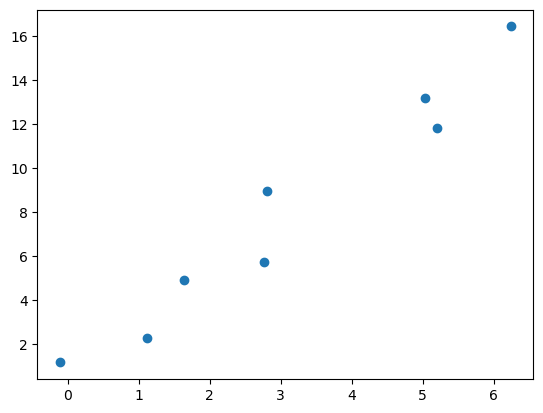

In [140]:
th.manual_seed(123) # to ensure reproducibility
var= 1 # 
X = th.arange(8) + th.randn(8)/var
Y = 2*(th.arange(8) + th.randn(8)/var) + 0.5 
# 
_ = plt.scatter(X,Y)

Our goal is to approximate this simple data set with a function $f$ such that 
$$
y_i \approx f(x_i)
$$ 
To find the right set of parameters that defines $f$, we want to minimize the mean square error:
$$ L = \sum_i (f(x_i) - y_i)^2.$$
Our first assumption is that $f$ is a linear function: 
$$ f(x) = wx+w_0.$$

The optimization program (or the gradient descent) starts with the random initialization of  the parameters $(w,w_0)$ 

In [142]:
w = th.randn(1,requires_grad=True)
w0= th.randn(1,requires_grad=True)

If we plot the line and the training points, this is not good (or you are very lucky):

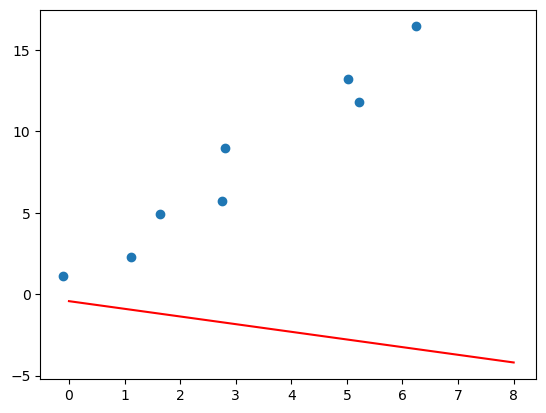

In [143]:
xs = th.linspace(0,8,2) # need 2 points for a line
plt.plot(xs,(w*xs+w0).detach(),'r')
plt.scatter(X,Y)


**TODO**: To quantify the poor quality of this random initialization, compute the loss function. 

In [144]:
#Loss function

loss = (w*X+w0-Y).pow(2).sum()

print(loss)

tensor(1085.4353, grad_fn=<SumBackward0>)


**TODO:** Use the `backward` function to get the gradient of the loss with respect to the parameters. 
- Print the gradients.
- Propose an update of the parameters 
- Verify if it improves the loss function

In [145]:
loss.backward()           # back propagation in the graph
print("w:",w)            
print("w.grad:",w.grad)  # the gradient of loss with respect to w 
print("w0:",w0)            
print("w0.grad:",w0.grad) # the gradient of loss with respect to w0

pas=0.005
w=w-pas*w.grad
w=w0-pas*w0.grad

loss = (w*X+w0-Y).pow(2).sum()

print(loss)

w: tensor([-0.4709], requires_grad=True)
w.grad: tensor([-689.6369])
w0: tensor([-0.4269], requires_grad=True)
w0.grad: tensor([-159.1206])
tensor(584.5292, grad_fn=<SumBackward0>)


# Optimizer 

The optimizer is an object that takes care of the parameter updates. The base class is `Optimizer` and the code is in the module `torch.optim`. Among the possible optimizer you can look at the documentation of `SGD`:

**TODO:** 
- Explain the parameters `lr`;
- `weight_decay`;


In the future, you will also use `Adam`, but for the moment we focus on `SGD`.  
They all have the same (more or less) the same interface. 
To create an optimizer we need to create an object `SGD` with: 
- the parameters under consideration
- and the lr parameter. 

Assume here we want to learn `w` and `w0`: 

#lr is the learning rate. It allows to control how much the gradient is subtracted to the parameter at each step. It is the equivalent of the "pas" used is the previous code. w(t+1) = w(t) - lr*w(t+1).grad
#weight_decay is a parameter allowing to downgrade the influence (or amplify it if weight_decay is negative) of the gradient before computation of the new parameter. It appears in the equation w.grad(t) = w.grad(t) + weight_decay*w(t-1).

In [157]:
w = th.randn(1,requires_grad=True)
w0= th.randn(1,requires_grad=True)
trainable_parameters = (w,w0)
sgd = th.optim.SGD(trainable_parameters, lr=1)

The two important functions are: 
- `step` take the gradient of all the trainable parameters and make the update (remember we now have values for `w.grad` and `w0.grad`)
- and `zero_grad` resets the gradient values for a next training step.  

**TODO:**
- Compute the predicions for `X`
- Do the backward propagation and print `w,w0` with their gradients
- Make an update  and print `w,w0` with their gradients
- Run `zero_grad`  and print `w,w0` with their gradients
- Plot the new line defined by `w,w0`. 
- Do you think the value of `lr` is adapted ? 

tensor(281.5719, grad_fn=<SumBackward0>)

Parameters after gradient computation :
w: tensor([1.0764], requires_grad=True)
w.grad: tensor([-345.4725])
w0: tensor([-0.4015], requires_grad=True)
w0.grad: tensor([-82.3294])

Parameters after update :
w: tensor([346.5489], requires_grad=True)
w.grad: tensor([-345.4725])
w0: tensor([81.9279], requires_grad=True)
w0.grad: tensor([-82.3294])

Parameters after gradient re-initialization :
w: tensor([346.5489], requires_grad=True)
w.grad: None
w0: tensor([81.9279], requires_grad=True)
w0.grad: None


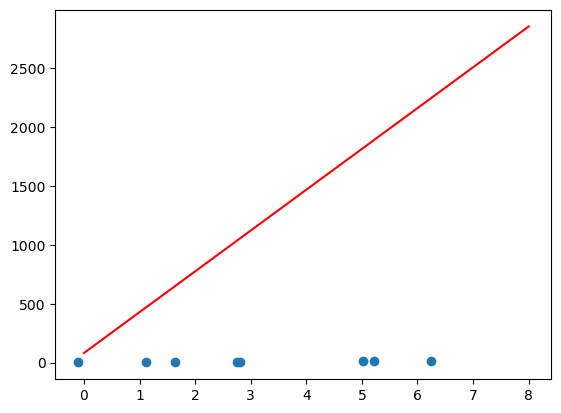

In [158]:
loss = (w*X+w0-Y).pow(2).sum()
print(loss)

loss.backward()

print("\nParameters after gradient computation :")
print("w:",w)            
print("w.grad:",w.grad)  # the gradient of loss with respect to w 
print("w0:",w0)            
print("w0.grad:",w0.grad) # the gradient of loss with respect to w0

sgd.step()

print("\nParameters after update :")
print("w:",w)            
print("w.grad:",w.grad)  # the gradient of loss with respect to w 
print("w0:",w0)            
print("w0.grad:",w0.grad) # the gradient of loss with respect to w0

sgd.zero_grad()

print("\nParameters after gradient re-initialization :")
print("w:",w)            
print("w.grad:",w.grad)  # the gradient of loss with respect to w 
print("w0:",w0)            
print("w0.grad:",w0.grad) # the gradient of loss with respect to w0

xs = th.linspace(0,8,2) # need 2 points for a line
plt.plot(xs,(w*xs+w0).detach(),'r')
plt.scatter(X,Y)

#lr is clearly not adapted and is too big. A better value should be around 0.01-0.1. Here, it goes from one extreme of the gradient to the other extreme.


# The training function

**TODO:***
Now you have everything to write the training code of the model:
- initialization of the parameters 
- loop of gradient descent
- record the loss evolution after each epoch
- plot the loss evolution along the training process
- look at the new decision boundary


Text(0, 0.5, 'Y')

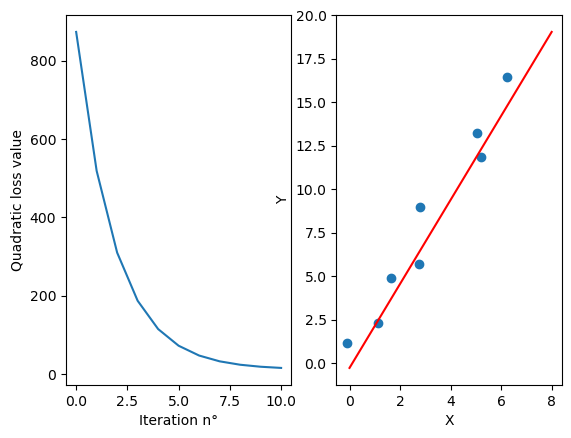

In [210]:
Nepoch = 10
lr = 1e-3
## Your code here 

#Initialization of the data
th.manual_seed(123) # to ensure reproducibility
var= 1 # 
X = th.arange(8) + th.randn(8)/var
Y = 2*(th.arange(8) + th.randn(8)/var) + 0.5 


#Initialization of parameters
w = th.randn(1,requires_grad=True)
w0= th.randn(1,requires_grad=True)
trainable_parameters = (w,w0)
sgd = th.optim.SGD(trainable_parameters, lr)

loss = (w*X+w0-Y).pow(2).sum()
loss_list = th.ones(1)
loss_list[0] = loss

#Computation of the ideal parameters
for i in range(Nepoch):
    loss.backward()
    sgd.step()
    sgd.zero_grad()
    loss = (w*X+w0-Y).pow(2).sum()
    loss_list = th.cat((loss_list, loss.unsqueeze(0)))

plt.subplot(1,2,1)
plt.plot(loss_list.detach().numpy())
plt.xlabel('Iteration n°')
plt.ylabel('Quadratic loss value')

plt.subplot(1,2,2)
xs = th.linspace(0,8,2) # need 2 points for a line
plt.plot(xs,(w*xs+w0).detach(),'r')
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

# Module
In the previous code we define our model "by hand". In practice, it is more convenient to use existing module (base class `Module`). For instance the linear transform $f(x) = wx+w_0$ is simply the application of a `Linear` module. 

**TODO**
- Look at the documentation
- rewrite the training code to use a `Linear` module. 
- Look at the result. 

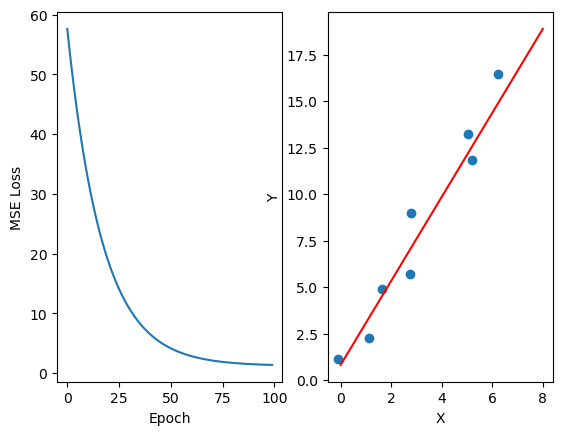

In [12]:
Nepoch = 100
lr = 1e-3

# Initialization of the data
th.manual_seed(123) # to ensure reproducibility
var = 1
X = th.arange(8) + th.randn(8) / var
Y = 2 * (th.arange(8) + th.randn(8) / var) + 0.5 

# Create a Linear module with one input and one output
linear_module = nn.Linear(1, 1)

# Define the loss function
loss_fn = nn.MSELoss() #Computes the quadratic loss

# Define the optimizer
optimizer = th.optim.SGD(linear_module.parameters(), lr=lr)

# Training loop
loss_list = []
for i in range(Nepoch):
    # Forward pass
    outputs = linear_module(X.unsqueeze(1))
    loss = loss_fn(outputs, Y.unsqueeze(1))
    loss_list.append(loss.item())
    
    # Backward pass and optimization step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot the loss curve
plt.subplot(1, 2, 1)
plt.plot(loss_list)
plt.xlabel('N')
plt.ylabel('Quadratic Loss')

# Plot the fitted line
plt.subplot(1, 2, 2)
xs = th.linspace(0, 8, 2).unsqueeze(1)
ys = linear_module(xs)
plt.plot(xs, ys.detach(), 'r')
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Logistic Regression
Let start with an easy dataset for binary classification. The following subsections just provide a dummy dataset and function to visualize the data-set. 



## Create the data


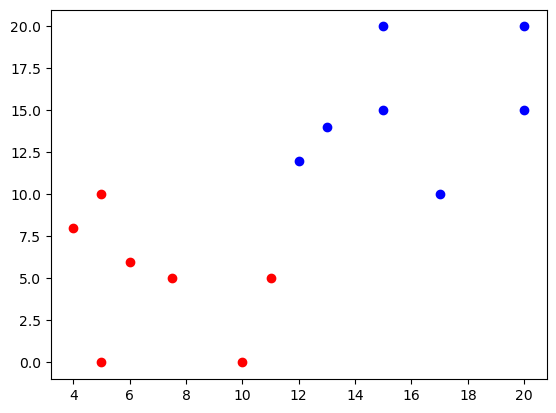

In [3]:
import numpy as np
ST1 = np.array([[17.0 ,12 ,13 ,15 ,15 ,20 ,20],[ 10 ,12 ,14 ,15 ,20 ,15 ,20]]) # class 1 
ST2 = np.array([4, 7.5, 10 ,11, 5 ,5 ,6, 8, 5, 0, 5, 0, 10, 6]).reshape(2,7) # class 2 
Xstudents = np.concatenate((ST1,ST2),axis=1)
Ystudents = np.ones(14)
Ystudents[7:] = 0

plt.scatter(ST1[0],ST1[1],color='b')
plt.scatter(ST2[0],ST2[1],color='r')


Can you plot the dataset with two colors (one for each class) ? 


## The model 


Define a logistic regression model with pytorch, learn it and vizualise the result. 
The roadmap is: 
* A simple neural model can rely on  **Sequential**. A model handles  **Tensors**. The data for a model should be converted into Tensors. Start by this transformation. 
* Create a regression model  (a single neuron with the logistic activation function, or a linear layer with one single neuron with the logistic activation). 
* Define the '**optimizer** (Take the basic Stochastic Gradient Descent). 
* Define the objective function
* Write the training loop and run it until convergence. It can be useful to play with learning rate. Run the gradient descent example by example. 
* Look at the solution 
* Start again in  **batch** mode (the gradient is estimated on the whole training set).



## From data to tensors / variables 


In [98]:
X = th.from_numpy(Xstudents.astype(np.float32)).transpose(1,0)
Y = th.from_numpy(Ystudents.astype(np.float32)).unsqueeze(1)

print(X)

tensor([[17.0000, 10.0000],
        [12.0000, 12.0000],
        [13.0000, 14.0000],
        [15.0000, 15.0000],
        [15.0000, 20.0000],
        [20.0000, 15.0000],
        [20.0000, 20.0000],
        [ 4.0000,  8.0000],
        [ 7.5000,  5.0000],
        [10.0000,  0.0000],
        [11.0000,  5.0000],
        [ 5.0000,  0.0000],
        [ 5.0000, 10.0000],
        [ 6.0000,  6.0000]])


## Create the model, its loss and optimizer

The model is a linear transformation followed by a Sigmoid function. This is equivalent to a logistic regression model. 

In [129]:
# The model 
D_in=2  # input size : 2 
D_out=1 # output size: one value 


lr = 0.001

model = nn.Sequential(
          nn.Linear(D_in, D_out),
          nn.Sigmoid()
)

# The loss
loss_fn = nn.BCELoss() 

# The optimizer
optimizer = th.optim.SGD(model.parameters(), lr=lr)

## Testing the model with data
Just run inference to see if everything is fine. 


In [100]:
# With a single input vector 
print(X[0])
prediction = model(X[0]) # or prediction = model.forward(X[0]) both are equivalent

print("For the first input: ",prediction)

# With 3 input vectors 
prediction = model(X[0:3])
print("For the 3 first inputs: ",prediction)

# For the whole dataset
prediction = model(X)
print("For all: ",prediction)



tensor([17., 10.])
For the first input:  tensor([0.9948], grad_fn=<SigmoidBackward0>)
For the 3 first inputs:  tensor([[0.9948],
        [0.9993],
        [0.9998]], grad_fn=<SigmoidBackward0>)
For all:  tensor([[0.9948],
        [0.9993],
        [0.9998],
        [0.9999],
        [1.0000],
        [0.9998],
        [1.0000],
        [0.9963],
        [0.9562],
        [0.3367],
        [0.9323],
        [0.4955],
        [0.9989],
        [0.9815]], grad_fn=<SigmoidBackward0>)


In [101]:
# With a single input vector 
prediction = model(X[0])
print("The first prediction: ",prediction, prediction.shape)
print("The reference: ",Y[0], Y[0].shape)

loss_fn(prediction,Y[0])



The first prediction:  tensor([0.9948], grad_fn=<SigmoidBackward0>) torch.Size([1])
The reference:  tensor([1.]) torch.Size([1])


tensor(0.0052, grad_fn=<BinaryCrossEntropyBackward0>)

This code should generate a warning or an error, since the label (or target value) and the prediction (considered as the input value of the loss) are of different dimensions. 

There is two ways to fix that. The first one is to reduce the input dimension using *squeeze*. The second one is to modify the target values. See the two cells below. 

In [102]:
prediction = model(X)
print("The first prediction: ",prediction, prediction.shape)
print("The reference: ",Y[0], Y[0].shape)

loss_fn(prediction,Y)



The first prediction:  tensor([[0.9948],
        [0.9993],
        [0.9998],
        [0.9999],
        [1.0000],
        [0.9998],
        [1.0000],
        [0.9963],
        [0.9562],
        [0.3367],
        [0.9323],
        [0.4955],
        [0.9989],
        [0.9815]], grad_fn=<SigmoidBackward0>) torch.Size([14, 1])
The reference:  tensor([1.]) torch.Size([1])


tensor(1.6692, grad_fn=<BinaryCrossEntropyBackward0>)

In [103]:
prediction = model(X[0])
Ymodified = Y.view(-1,1)
print("The first prediction: ",prediction, prediction.shape)
print("The reference: ",Ymodified[0], Ymodified[0].shape)

loss_fn(prediction,Ymodified[0])


The first prediction:  tensor([0.9948], grad_fn=<SigmoidBackward0>) torch.Size([1])
The reference:  tensor([1.]) torch.Size([1])


tensor(0.0052, grad_fn=<BinaryCrossEntropyBackward0>)

## Training loop

**TODO:** Now we have everything to train the model. 

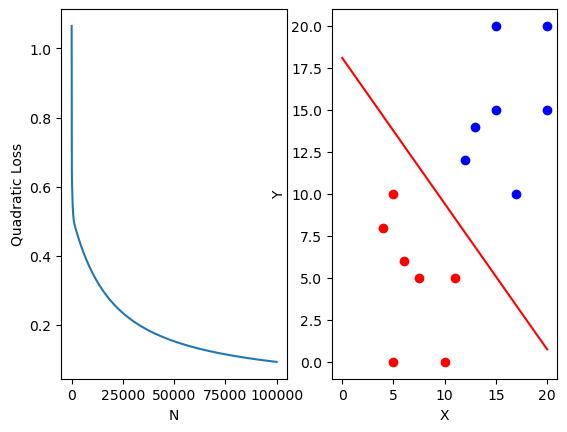

La valeur finale de loss est :  0.09353754669427872


In [130]:
Nepoch = 100000
# Training loop
loss_list = []
for i in range(Nepoch):
    # Forward pass
    optimizer.zero_grad()
    outputs = model(X)

    loss = loss_fn(outputs, Y)
    loss_list.append(loss.item())
    
    # Backward pass and optimization step
    
    loss.backward()
    optimizer.step()


# Plot the loss curve
plt.subplot(1, 2, 1)
plt.plot(loss_list)
plt.xlabel('N')
plt.ylabel('Quadratic Loss')

# Plot the fitted line
plt.subplot(1, 2, 2)
xs = th.linspace(0, 20, 2)

b = model[0].bias.data.numpy()
w0, w1 = model[0].weight.data.numpy().squeeze()
plt.plot(xs, -(w0*xs + b)/w1, 'r')

plt.scatter(ST1[0],ST1[1],color='b')
plt.scatter(ST2[0],ST2[1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print("La valeur finale de loss est : ", loss_list[-1])


It is better to visualize the evolution of the loss function: to be sure that everything went well. The idea is to store the loss values in a numpy array and then to plot it. 

**TODO:** Modify the code above to do that. 

## Explore the "solution" 

Here, we look at the different wrapping steps: 
- The model is a set of modules
- A Linear module is a matrix of weights along with a bias vector. They are parameters.
- A Parameter wrap a tensor
- A tensor can be casted as a numpy array


In [121]:
mod = model[0]
print(type(mod))
print(type(mod.bias))
print(type(mod.bias.data))
print(type(mod.bias.data.numpy()))


<class 'torch.nn.modules.linear.Linear'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.Tensor'>
<class 'numpy.ndarray'>


We can look at the parameters: 

In [122]:
print(mod.bias.data.view(1,1))
print(mod.weight.data)

tensor([[-6.0999]])
tensor([[0.2924, 0.3371]])


## Impact of the learning rate 

Now, we will use the same model trained with a different learning rate. The training process restarts from scratch. We need to therefore to re-create the model and the associated optimizer. 

In [126]:
model = th.nn.Sequential(
    th.nn.Linear(D_in, D_out),
    th.nn.Sigmoid()    
)
learning_rate = 1e-1
optimizer = th.optim.SGD(model.parameters(), lr=learning_rate) 

We now have the same model as before, randomly initialized. We train this same model with a different learning rate, a larger one. 

- Run the training with the same number of epochs and compare the loss value we get at the end
- Do you think we can reach the same value with the learning rate of 1e-2, but with a longer training ? 
- Try the same thing with a learning rate of 0.5, what do you observe ? 



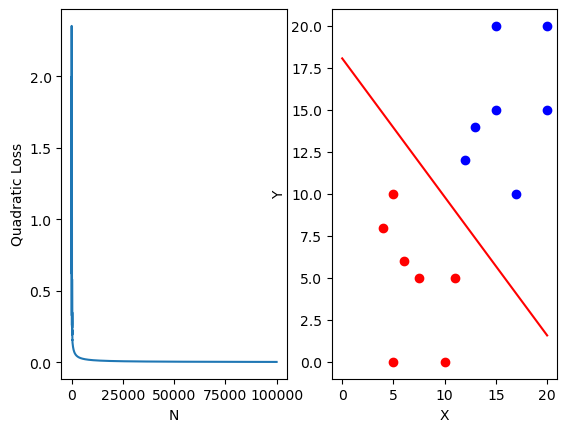

La valeur finale de loss est :  0.001854766276665032


In [127]:
Nepoch = 100000
# Training loop
loss_list = []
for i in range(Nepoch):
    # Forward pass
    optimizer.zero_grad()
    outputs = model(X)

    loss = loss_fn(outputs, Y)
    loss_list.append(loss.item())
    
    # Backward pass and optimization step
    
    loss.backward()
    optimizer.step()


# Plot the loss curve
plt.subplot(1, 2, 1)
plt.plot(loss_list)
plt.xlabel('N')
plt.ylabel('Quadratic Loss')

# Plot the fitted line
plt.subplot(1, 2, 2)
xs = th.linspace(0, 20, 2)

b = model[0].bias.data.numpy()
w0, w1 = model[0].weight.data.numpy().squeeze()
plt.plot(xs, -(w0*xs + b)/w1, 'r')

plt.scatter(ST1[0],ST1[1],color='b')
plt.scatter(ST2[0],ST2[1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print("La valeur finale de loss est : ", loss_list[-1])

Le learning rate de 0.1 est bien plus adapté au calcul de paramètres idéaux et converge bien plus vite. Le lr est 100x plus grand que l'exemple précédent mais la loss value est 100 fois plus petite.

In [133]:
model = th.nn.Sequential(
    th.nn.Linear(D_in, D_out),
    th.nn.Sigmoid()    
)
learning_rate = 1e-2
optimizer = th.optim.SGD(model.parameters(), lr=learning_rate) 

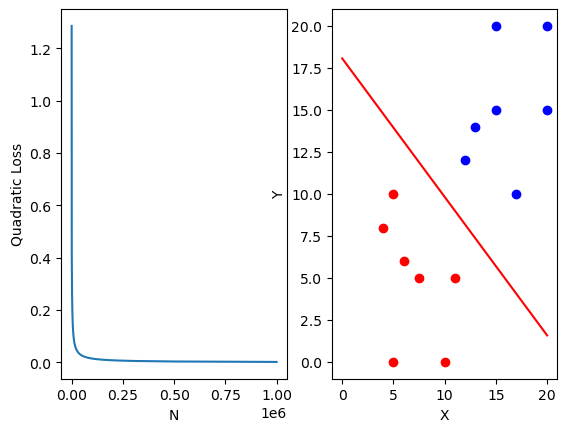

La valeur finale de loss est :  0.001881089643575251


In [134]:
Nepoch = 1000000
# Training loop
loss_list = []
for i in range(Nepoch):
    # Forward pass
    optimizer.zero_grad()
    outputs = model(X)

    loss = loss_fn(outputs, Y)
    loss_list.append(loss.item())
    
    # Backward pass and optimization step
    
    loss.backward()
    optimizer.step()


# Plot the loss curve
plt.subplot(1, 2, 1)
plt.plot(loss_list)
plt.xlabel('N')
plt.ylabel('Quadratic Loss')

# Plot the fitted line
plt.subplot(1, 2, 2)
xs = th.linspace(0, 20, 2)

b = model[0].bias.data.numpy()
w0, w1 = model[0].weight.data.numpy().squeeze()
plt.plot(xs, -(w0*xs + b)/w1, 'r')

plt.scatter(ST1[0],ST1[1],color='b')
plt.scatter(ST2[0],ST2[1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print("La valeur finale de loss est : ", loss_list[-1])

Pour avoir une loss value équivalente à celle précédente avec un learning rate de 1e-2, il faut entraîner le modèle 10 fois plus.

In [135]:
model = th.nn.Sequential(
    th.nn.Linear(D_in, D_out),
    th.nn.Sigmoid()    
)
learning_rate = 0.5
optimizer = th.optim.SGD(model.parameters(), lr=learning_rate) 

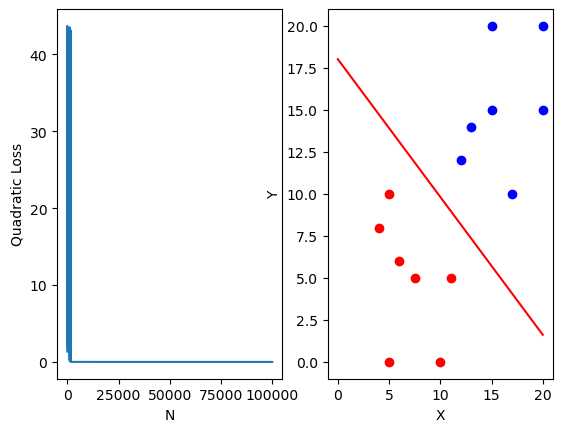

La valeur finale de loss est :  0.0003875774855259806


In [136]:
Nepoch = 100000
# Training loop
loss_list = []
for i in range(Nepoch):
    # Forward pass
    optimizer.zero_grad()
    outputs = model(X)

    loss = loss_fn(outputs, Y)
    loss_list.append(loss.item())
    
    # Backward pass and optimization step
    
    loss.backward()
    optimizer.step()


# Plot the loss curve
plt.subplot(1, 2, 1)
plt.plot(loss_list)
plt.xlabel('N')
plt.ylabel('Quadratic Loss')

# Plot the fitted line
plt.subplot(1, 2, 2)
xs = th.linspace(0, 20, 2)

b = model[0].bias.data.numpy()
w0, w1 = model[0].weight.data.numpy().squeeze()
plt.plot(xs, -(w0*xs + b)/w1, 'r')

plt.scatter(ST1[0],ST1[1],color='b')
plt.scatter(ST2[0],ST2[1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print("La valeur finale de loss est : ", loss_list[-1])

Pour un learning rate de 0.5, le modèle n'arrive pas au début à converger, le pas est trop grand et passe d'une pente du gradient à l'autre, mais les paramètres finissent par se stabiliser et la loss value oscille autour de 0.